In [1]:
from qutip import *
import numpy as np
import os
import matplotlib.pyplot as plt
from math import factorial
from scipy.optimize import fsolve
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
import sys

sys.path.append("python_scripts")

from hamiltonian_util import *
from spatial_util import *
from wigner_util import *

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
n = 93
top = cm.get_cmap('viridis', 128)
bottom = cm.get_cmap('viridis', 128)
bottom = bottom(np.linspace(.96, 1, n))*np.transpose([np.linspace(1, 1, n), np.linspace(1, 1, n), np.linspace(1, 1, n), np.linspace(1, 0, n)**1])

newcolors = np.vstack((top(np.linspace(0, 1, 128 - n)),
                       bottom))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [33]:
N = 10
x = np.sqrt(0)
epsilon_x = 3e3
epsilon_y = 3e3
rabi_x_x = 10e3
rabi_y_y = 10e3
delta_z = 0.3e3
sqrt_gamma_x = np.sqrt(0)
sqrt_gamma_y = np.sqrt(0)
sqrt_gamma_phase = np.sqrt(0)
num_steps = 64
exp_time = 0.02
granularity = 2
tau = 5e-3

In [34]:
# Motional operators
a = destroy(N)
iden_N = identity(N)

# Hamiltonians
HO_X, HO_Y, JT_X, JT_Y, H_Z = get_default_hamiltonian_one_ion(N, epsilon_x, epsilon_y, rabi_x_x, rabi_y_y, delta_z)

JT_PX = -1.j*np.pi*rabi_x_x*tensor(a.dag() - a, iden_N, identity(2))

JT = rabi_x_x*np.pi*(tensor((a + a.dag())**2, identity(N), identity(2)) + tensor(identity(N), (a + a.dag())**2, identity(2))).sqrtm()

In [35]:
# Jump Operators
jump_operators = get_jump_operators_one_ion(N, sqrt_gamma_x, sqrt_gamma_y, sqrt_gamma_phase)

In [24]:
Hamiltonians = list()
for l in range(64):
    Hamiltonians.append([HO_X, HO_Y, [JT_X + JT_Y, f't/{tau}']])  

times = list()
for l in range(64):
    times.append(np.linspace(l*tau/64, (l+1)*tau/64, 25))

t_total = np.linspace(0, tau, 1600)

In [25]:
plus = (1/np.sqrt(2))*(basis(2, 0) + basis(2, 1))
psi0 = tensor(tensor(thermal_dm(N, 0), thermal_dm(N, 0)), plus*plus.dag())

In [26]:
states = evolution_by_steps(times, Hamiltonians, psi0, [])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


KeyboardInterrupt: 

In [ ]:
xvec = np.linspace(-5, 5, 100)
overall_probs_0 = get_2d_spatial_distribution(states[0].ptrace([0,1]), N, xvec)
overall_probs_1 = get_2d_spatial_distribution(states[-1].ptrace([0,1]), N, xvec)

In [ ]:
normal = overall_probs_0/np.sum(overall_probs_0*(10/100)**2)
crescent = overall_probs_1/np.sum(overall_probs_1*(10/100)**2)

C:\Users\12482\miniconda3\lib\site-packages\numpy\ma\core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


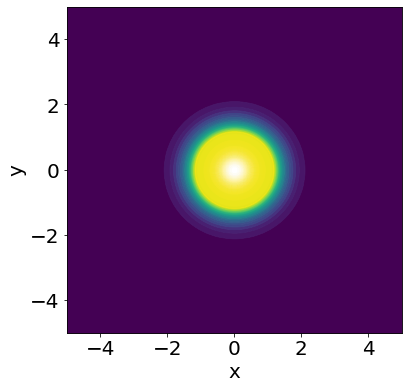

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cnt = ax.contourf(xvec, xvec, normal, 100, cmap=newcmp)

ax.set_xlabel("x")
ax.set_ylabel("y")

for c in cnt.collections:
    c.set_edgecolor("face")

fig.savefig("figures/gaussian.pdf", bbox_inches='tight')

plt.show()

C:\Users\12482\miniconda3\lib\site-packages\numpy\ma\core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


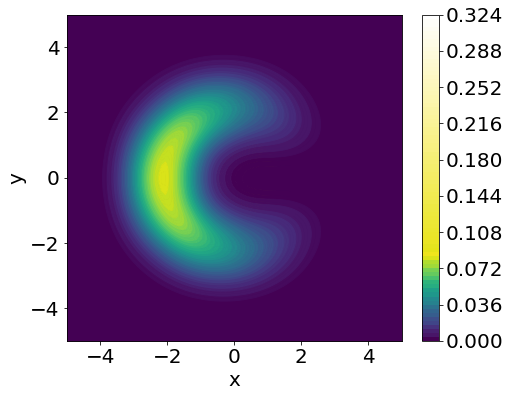

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6))
cc = ax.contourf(xvec, xvec, normal, 100, cmap=newcmp)
cnt = ax.contourf(xvec, xvec, crescent, 100, cmap=newcmp, vmin=0, vmax=np.real(np.max(normal)))
cbar = fig.colorbar(cc, ax=ax)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=20)

ax.set_xlabel("x")
ax.set_ylabel("y")

for c in cnt.collections:
    c.set_edgecolor("face")

fig.savefig("figures/crescent.pdf", bbox_inches='tight')

plt.show()

In [36]:
Hamiltonians = list()
for l in range(64):
    Hamiltonians.append([HO_X, HO_Y, [JT_X + JT_Y + H_Z, f't/{tau}']])

times = list()
for l in range(64):
    times.append(np.linspace(l*tau/64, (l+1)*tau/64, 25))

t_total = np.linspace(0, tau, 1600)

In [37]:
plus = (1/np.sqrt(2))*(basis(2, 0) + basis(2, 1))
psi0 = tensor(tensor(thermal_dm(N, 0), thermal_dm(N, 0)), plus*plus.dag())

In [38]:
states = evolution_by_steps(times, Hamiltonians, psi0, [])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


In [39]:
xvec = np.linspace(-5, 5, 100)
overall_probs_0 = get_2d_spatial_distribution(states[0].ptrace([0,1]), N, xvec)
overall_probs_1 = get_2d_spatial_distribution(states[-1].ptrace([0,1]), N, xvec)

In [40]:
normal = overall_probs_0/np.sum(overall_probs_0*(10/100)**2)
twisted = overall_probs_1/np.sum(overall_probs_1*(10/100)**2)

C:\Users\12482\miniconda3\lib\site-packages\numpy\ma\core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\12482\AppData\Local\Temp\ipykernel_14924\3712951421.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("figures/twisted.pdf", bbox_inches='tight', rasterized=True)


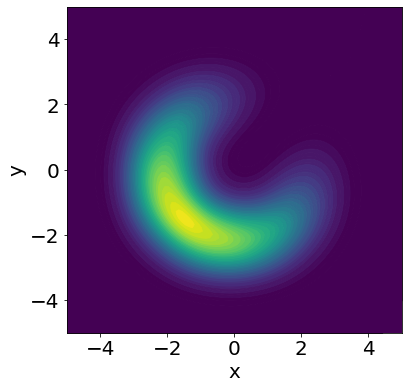

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cnt = ax.contourf(xvec, xvec, twisted, 100, cmap=newcmp, vmin=0, vmax=np.real(np.max(normal)))

ax.set_xlabel("x")
ax.set_ylabel("y")

for c in cnt.collections:
    c.set_edgecolor("face")

fig.savefig("figures/twisted.pdf", bbox_inches='tight', rasterized=True)

plt.show()

In [42]:
Hamiltonians = list()

for l in range(64):
    Hamiltonians.append([HO_X, HO_Y, [-1*JT, f't/{tau}']])   

times = list()
for l in range(64):
    times.append(np.linspace(l*tau/64, (l+1)*tau/64, 25))

t_total = np.linspace(0, tau, 1600)

In [43]:
plus = (1/np.sqrt(2))*(basis(2, 0) + basis(2, 1))
psi0 = tensor(tensor(thermal_dm(N, 0), thermal_dm(N, 0)), plus*plus.dag())

In [44]:
states = evolution_by_steps(times, Hamiltonians, psi0, [])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


In [45]:
xvec = np.linspace(-5, 5, 100)
overall_probs_0 = get_2d_spatial_distribution(states[0].ptrace([0,1]), N, xvec)
overall_probs_1 = get_2d_spatial_distribution(states[-1].ptrace([0,1]), N, xvec)

In [46]:
normal = overall_probs_0/np.sum(overall_probs_0*(10/100)**2)
ring = overall_probs_1/np.sum(overall_probs_1*(10/100)**2)

C:\Users\12482\miniconda3\lib\site-packages\numpy\ma\core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


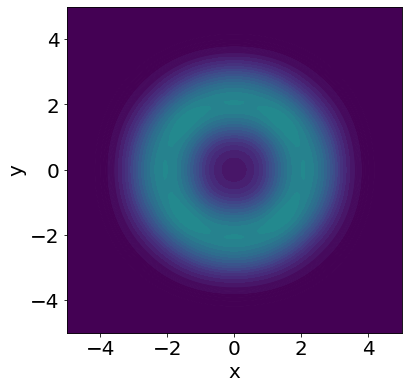

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cnt = ax.contourf(xvec, xvec, ring, 100, cmap=newcmp, vmin=0, vmax=np.real(np.max(normal)))

ax.set_xlabel("x")
ax.set_ylabel("y")

for c in cnt.collections:
    c.set_edgecolor("face")

fig.savefig("figures/ring.pdf", bbox_inches='tight')

plt.show()

### Energy Surface

C:\Users\12482\AppData\Local\Temp\ipykernel_14924\3130128144.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


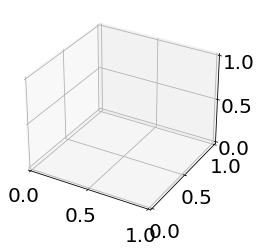

In [92]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Make data.
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z_1 = 0.5*(R**2 + 3*R*np.sqrt(2))
Z_2 = 0.5*(R**2 - 3*R*np.sqrt(2))

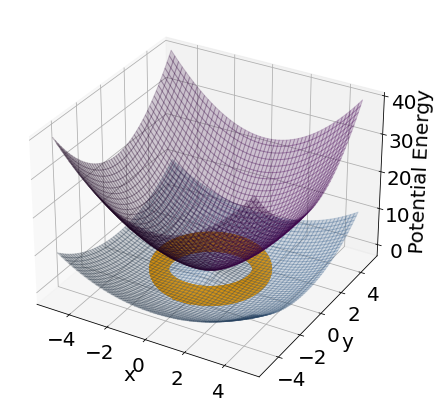

In [94]:
# 3D Surface plot
fig = plt.figure(1,figsize = (16,16))
ax = plt.subplot(211, projection='3d')

# Create array to specify color of each pixel on surface
Ys = Y*0

cmap = plt.cm.viridis
ax.set_zlabel("Potential Energy")
ax.set_xlabel("x")
ax.set_ylabel("y")
zline = np.linspace(0, 0, 2000)
xline = (10/3/np.sqrt(2))*np.sin(np.linspace(0, 2*np.pi, 2000))
yline = (-10/3/np.sqrt(2))*np.cos(np.linspace(0, 2*np.pi, 2000))
ax.plot_surface(X, Y, Z_1, facecolors=cmap(Ys), alpha=0.2)
Ys = Y*0 + 0.3

ax.plot_surface(X, Y, Z_2, facecolors=cmap(Ys), alpha=0.2)

ax.plot3D(xline, yline, zline, 'orange', linewidth=20) # Data for three-dimensional 
ax.plot3D(xline, yline, zline, 'orange', linewidth=20)

fig.savefig("figures/potential_energy_surface.pdf", bbox_inches='tight')

plt.show()